# Holstein Lattice Model Examples

### Mean Field calculations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qc_lab import Simulation # import simulation class 
from qc_lab.models import HolsteinLattice # import model class 
from qc_lab.algorithms import MeanField # import algorithm class 
from qc_lab.dynamics import serial_driver # import dynamics driver


100%|██████████| 3001/3001 [00:00<00:00, 5591.94it/s]


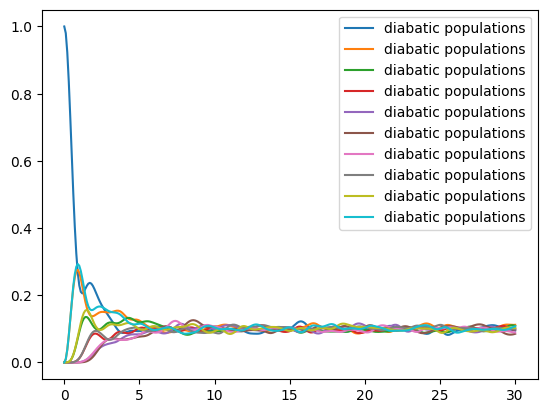

In [ ]:

sim = Simulation()

sim.settings.num_trajs = 200
sim.settings.batch_size = 50
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = HolsteinLattice({
    'N':10,
    'j':1.0,
    'w':1.0,
    'g':1.0,
    'phonon_mass':1.0,
    'temp':1.0,
    'periodic_boundary':True

})
sim.algorithm = MeanField()

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[0] += 1.0

data = serial_driver(sim)

plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dic['dm_db']))/sim.settings.num_trajs)
plt.legend()
plt.show()

### Surface Hopping Calculations

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from qc_lab import Simulation # import simulation class 
from qc_lab.models import HolsteinLattice # import model class 
from qc_lab.algorithms import FewestSwitchesSurfaceHopping # import algorithm class 
from qc_lab.dynamics import serial_driver # import dynamics driver

#### Stochastic sampling

100%|██████████| 3001/3001 [00:04<00:00, 634.57it/s]
/tmp/ipykernel_757787/1033055371.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


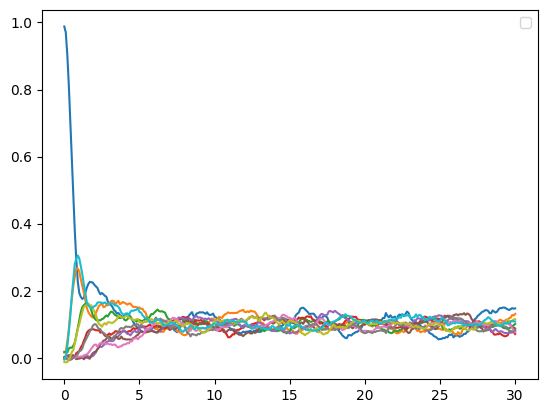

In [10]:
sim = Simulation()

sim.settings.num_trajs = 200
sim.settings.batch_size = 50
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = HolsteinLattice({
    'N':10,
    'j':1.0,
    'w':1.0,
    'g':1.0,
    'phonon_mass':1.0,
    'temp':1.0,
    'periodic_boundary':True

})
sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':False,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[0] += 1.0

data = serial_driver(sim)

plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dic['dm_db']))/sim.settings.num_trajs)
plt.legend()
plt.show()

#### Deterministic sampling

To use deterministic sampling we multiply the number of trajectories and batch size by the number of states. Note that the convergence behavior changes.

100%|██████████| 3001/3001 [00:43<00:00, 69.73it/s]
/tmp/ipykernel_757787/963138260.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


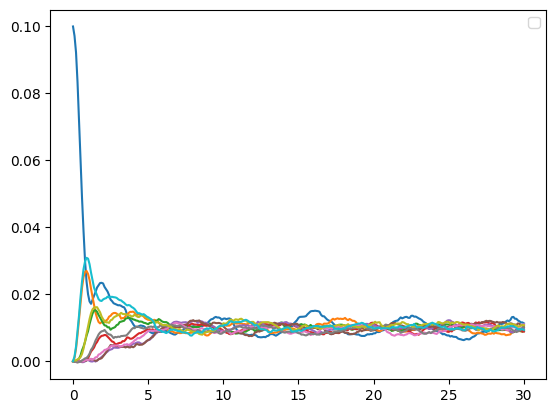

In [12]:
sim = Simulation()

sim.settings.num_trajs = 200*10
sim.settings.batch_size = 50*10
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = HolsteinLattice({
    'N':10,
    'j':1.0,
    'w':1.0,
    'g':1.0,
    'phonon_mass':1.0,
    'temp':1.0,
    'periodic_boundary':True

})
sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':True,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[0] += 1.0

data = serial_driver(sim)

plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dic['dm_db']))/sim.settings.num_trajs)
plt.legend()
plt.show()